<a href="https://colab.research.google.com/github/dhivyasreedhar/TSF_GRIP/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis on 'Global Terrorism'**


Dataset: https://bit.ly/2TK5Xn5

**Task completed  by Dhivya.S**

Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the file

In [4]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


Gettting some insights from the data

In [5]:
df.shape

(18870, 135)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Columns: 135 entries, eventid to related
dtypes: float64(57), int64(22), object(56)
memory usage: 19.4+ MB


In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Since the dataframe contains 135 columns. There is a huge number of irrelevant data in dataset and not all of them are necessary. So we will only extract the necessary columns.

In [8]:
df=df[['iyear','imonth','iday','country_txt','provstate',
       'region_txt','attacktype1_txt','target1','nkill',
       'nwound','summary','gname','targtype1_txt','weaptype1_txt','motive']]

In [9]:
df.head()

,iyear,imonth,iday,country_txt,provstate,region_txt,attacktype1_txt,target1,nkill,nwound,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
df.describe()

,iyear,imonth,iday,nkill,nwound
count,18870.000000,18870.000000,18870.000000,15348.000000,13827.000000
mean,1978.517011,6.198781,15.206465,1.672335,1.423158
std,3.409654,3.448318,8.955007,7.496595,10.227504
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1977.000000,3.000000,8.000000,0.000000,0.000000
50%,1979.000000,6.000000,15.000000,0.000000,0.000000
75%,1981.000000,9.000000,23.000000,1.000000,0.000000
max,1986.000000,12.000000,31.000000,422.000000,700.000000


In [11]:
#checking for missing values
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
provstate             85
region_txt             0
attacktype1_txt        0
target1              192
nkill               3522
nwound              5043
summary            17913
gname                  0
targtype1_txt          0
weaptype1_txt          0
motive             18182
dtype: int64

Data Visualisation

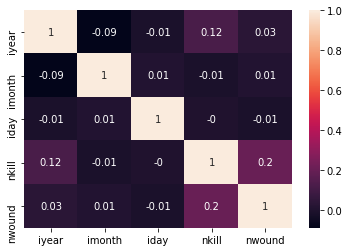

In [12]:
sns.heatmap(np.round(df.corr(),2),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd791b2690>,
      dtype=object)

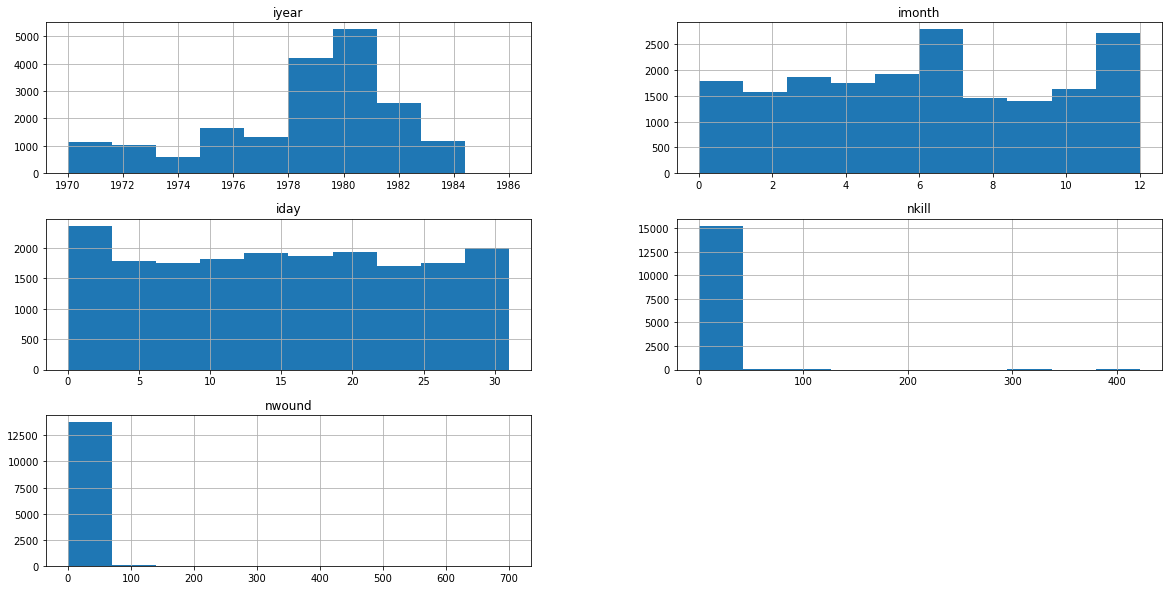

In [13]:
df.hist(figsize=(20,10))

Countries affected with maximum number of attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


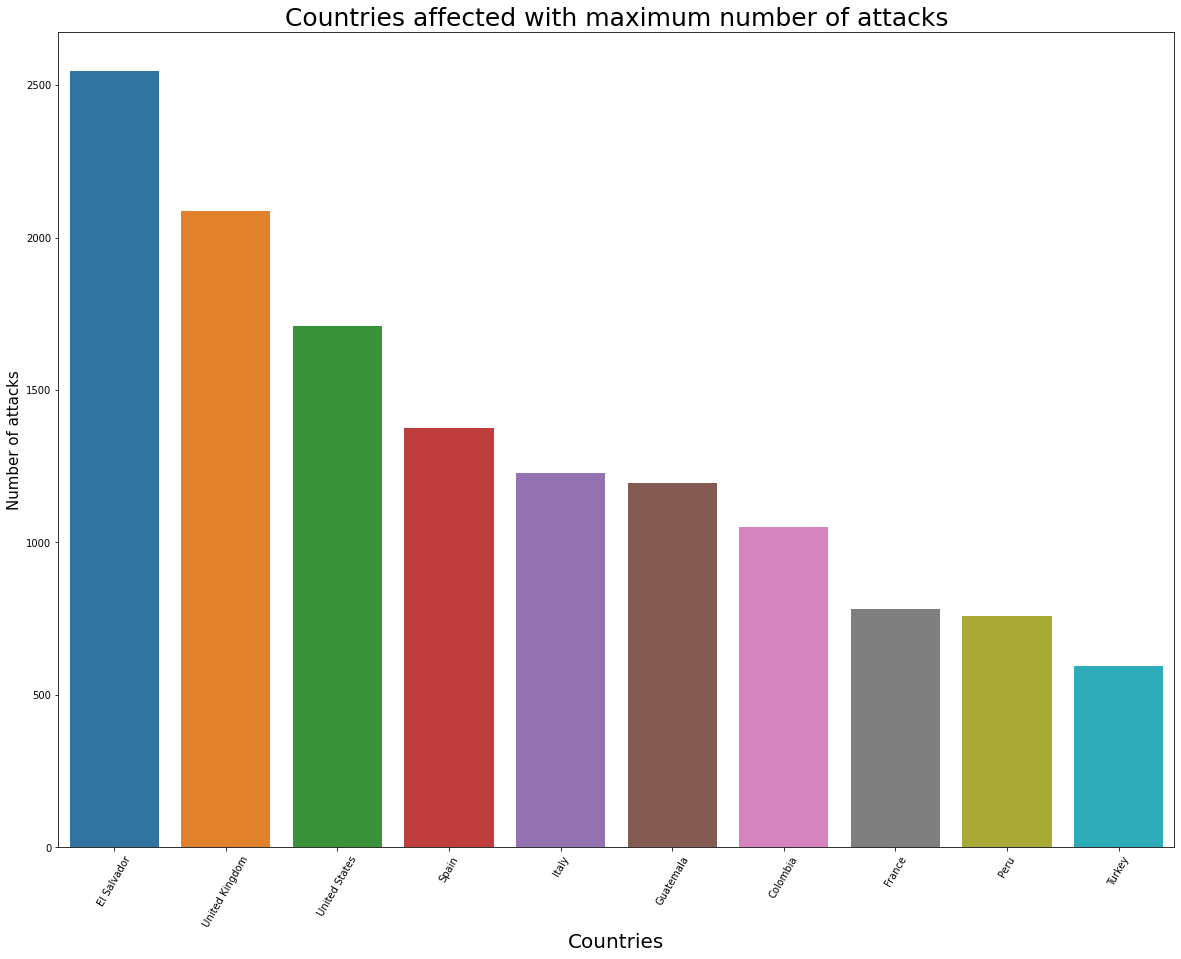

In [14]:
plt.subplots(figsize = (20,15))
sns.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values)
plt.title('Countries affected with maximum number of attacks',fontsize = 25)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('Number of attacks', fontsize =15)
plt.xticks(rotation = 60)
plt.show()


Count of Attacks Region wise

Text(0.5, 1.0, 'Most Attacked Cities')

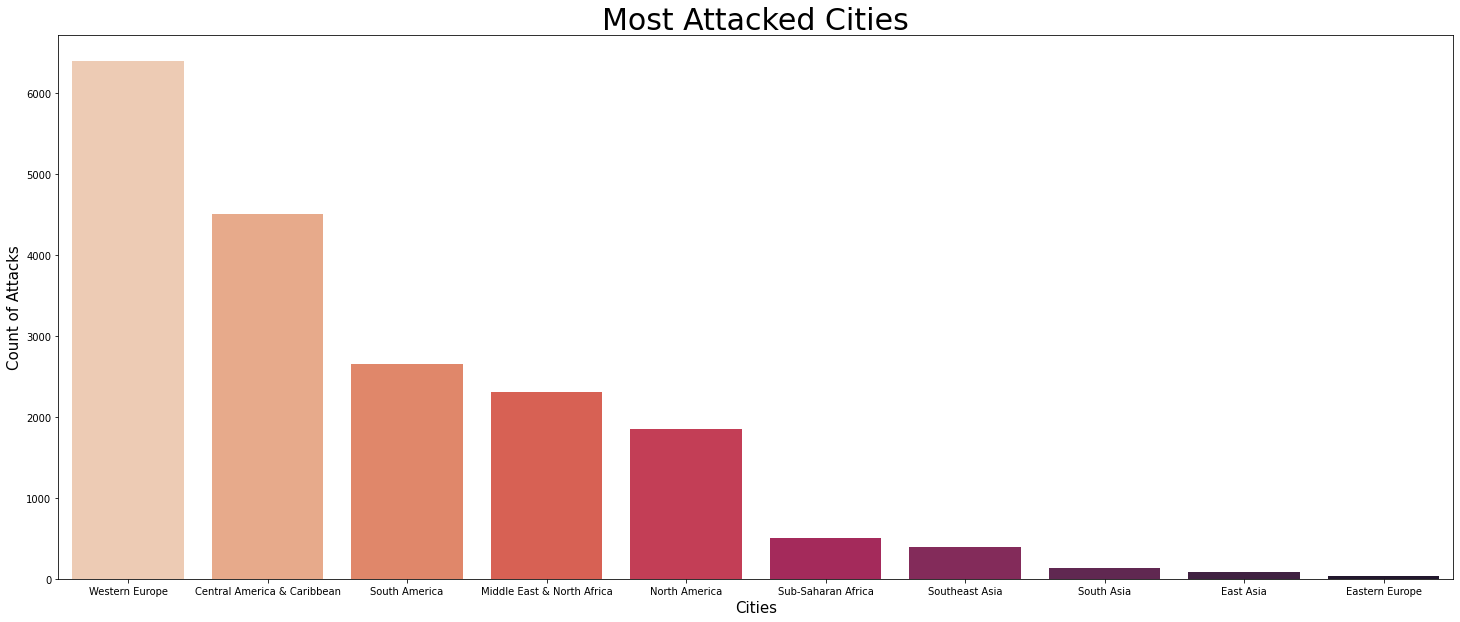

In [15]:
Count_of_attacks = df['region_txt'].value_counts().values[:10]
City = df['region_txt'].value_counts().index[:10]

fig,ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=City, y=Count_of_attacks, palette="rocket_r")
ax.set_ylabel(ylabel = 'Count of Attacks', fontsize = 15)
ax.set_xlabel(xlabel = 'Cities', fontsize = 15)
ax.set_title('Most Attacked Cities',fontsize=30)

Terrorist Activities by Region in each Year through Area Plot

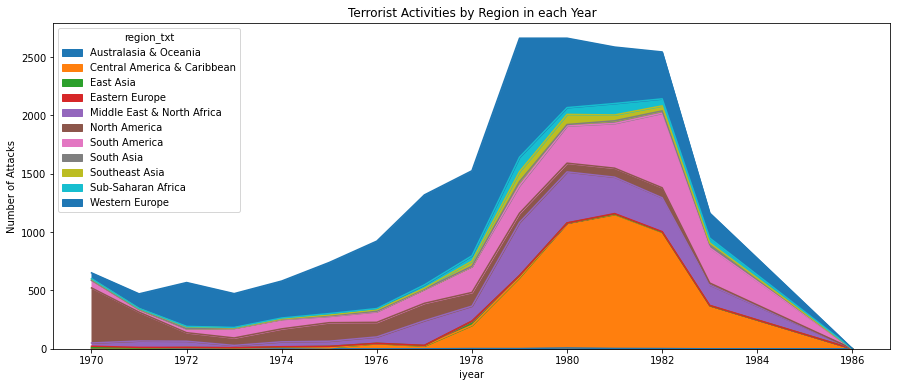

In [16]:
pd.crosstab(df.iyear, df.region_txt	).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

Number of Terrorist Activities each Year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


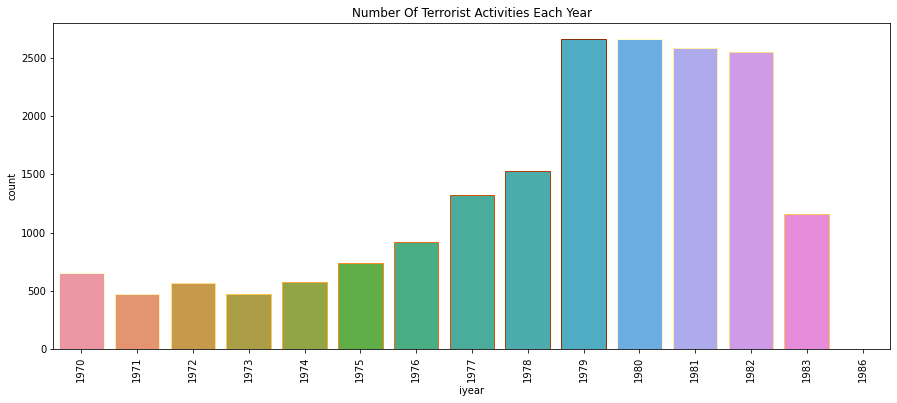

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Method of Attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


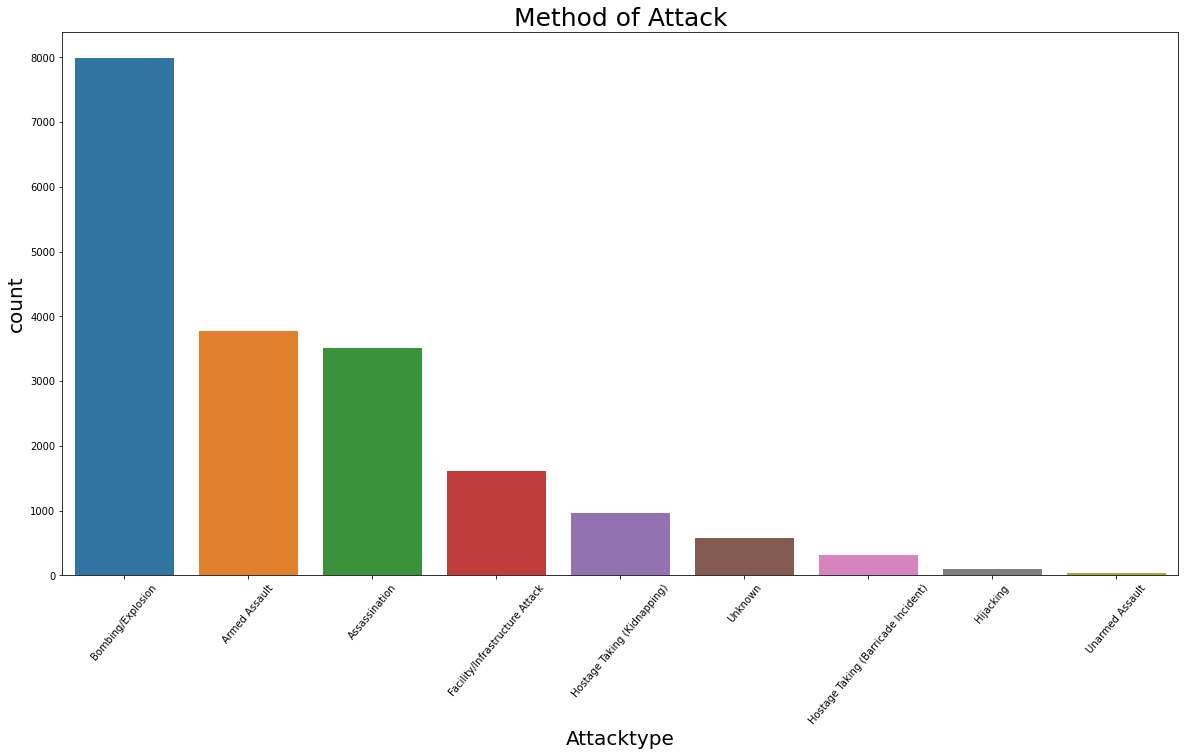

In [18]:
plt.subplots(figsize=(20,10))
sns.countplot(df["attacktype1_txt"],order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=50,fontsize =10)
plt.xlabel("Attacktype",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.title("Method of Attack",fontsize=25)
plt.show()


Top 10 Terrorist group attack

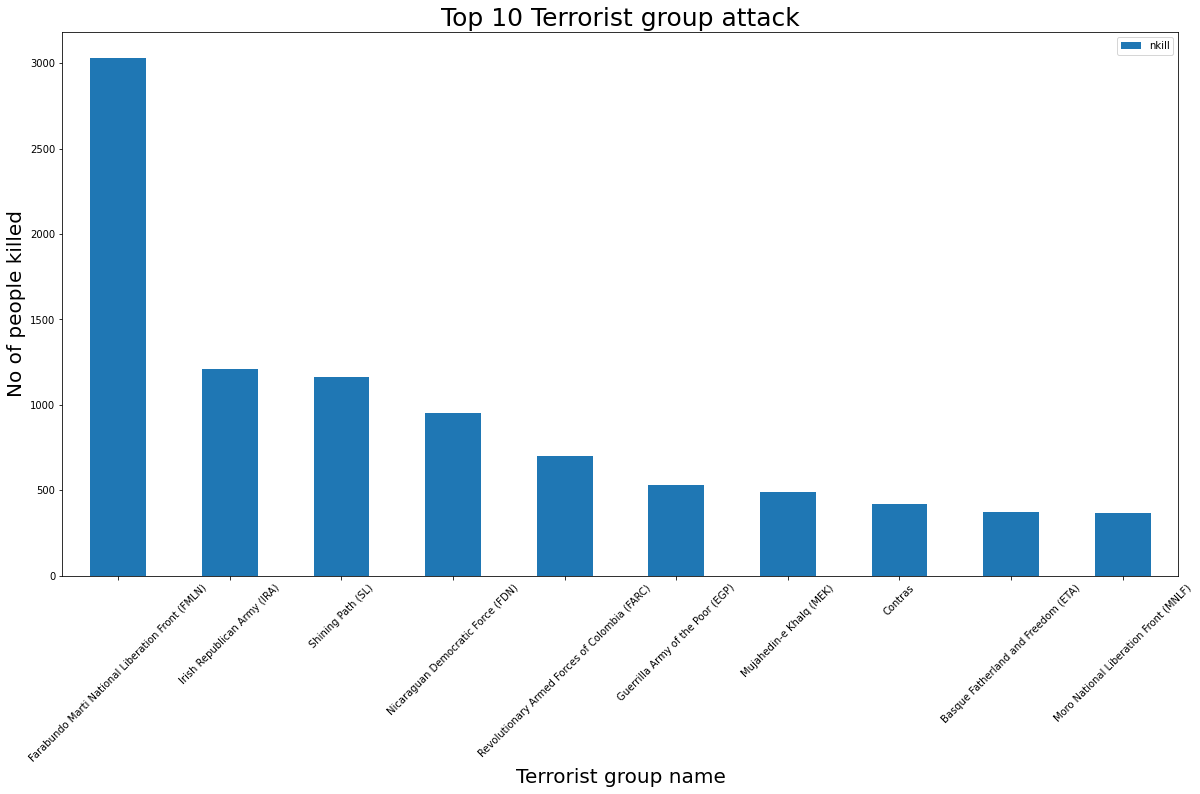

In [19]:
df[['gname','nkill']].groupby(['gname'],axis=0).sum().drop('Unknown').sort_values('nkill',ascending=False).head(10).plot(kind='bar',figsize=(20,10))
plt.title("Top 10 Terrorist group attack",fontsize=25)
plt.xlabel("Terrorist group name",fontsize=20)
plt.ylabel("No of people killed",fontsize=20)
plt.xticks(rotation = 45)
plt.show()

Types of weapons used that caused deaths

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


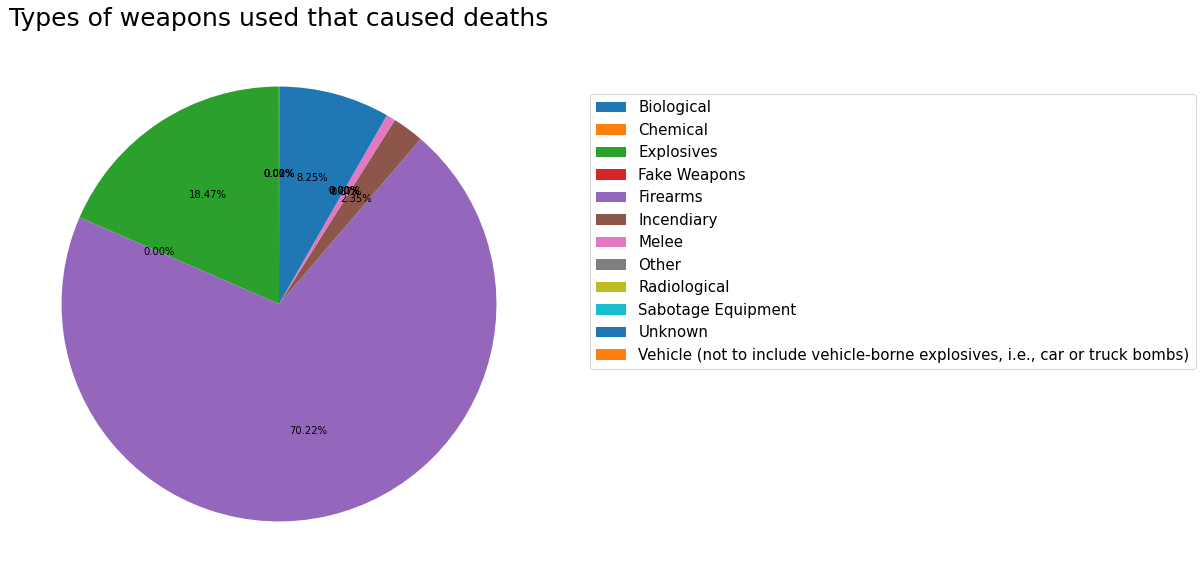

In [20]:
weapontype = df.pivot_table(columns='weaptype1_txt', values='nkill', aggfunc='sum')
weapontype

labels = weapontype.columns.tolist() # convert line to list
transpoze = weapontype.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of weapons used that caused deaths',fontsize = 25)
plt.legend(labels, loc='upper right', bbox_to_anchor = (2.2, 0.9), fontsize=15) # location legend
plt.show()

Most Active Terrorist Organizations

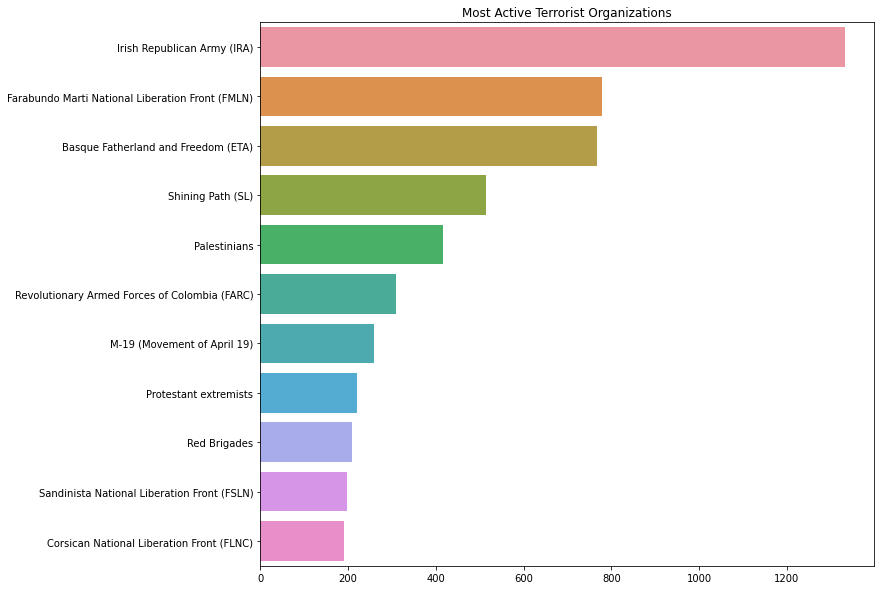

In [21]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['gname'].value_counts()[1:12].index,x=df['gname'].value_counts()[1:12].values)
plt.title('Most Active Terrorist Organizations')
plt.show()

**Conclusion**

From the above analysis and visualization the following information is concluded :
Country affected by the most terror attacks : Iraq

Regions with highest terrorist attacks : Middle East & North Africa

Mostly used weapon : Firearms and Explosives

Year with the most attacks : 2014

Group with the most attacks : Taliban